In [1]:
import pandas as pd
import numpy as np
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

Read data into a pandas Dataframe. We need to specify an encoding because the dataset has some characters that aren't in the Python default utf-8 encoding.

In [2]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire 

Notice RespondentID for first row is NaN. However, RespondentID is supposed to be a unique number for each respondent. Therefore, we need to remove any rows with an invalid RespondentID.

In [3]:
star_wars = star_wars[pd.notnull(star_wars['RespondentID'])]

pandas.notnull() function to remove rows where the RespondentID column is NaN. At the end, star_wars only consists of rows where RespondentID is not null.

In [4]:
list(star_wars.columns.values)

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

If we look at the next two columns:'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?', 
we see they are both Yes/No questions. There's another value they can take on, NaN, when a respondent chose not to answer that question.
 
In order to make it easier to analyze, convert the string types-Yes or No to boolean types-True, False or NaN.

Booleans are easier to work with because you can select the rows that are True or False without having to do a string comparisons.

In [5]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'
                    ].value_counts(dropna = False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [6]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'
                    ].value_counts(dropna = False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [7]:
yes_no = {
    "Yes": True,
    "No": False
}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)                 

In [8]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'
                    ].value_counts(dropna = False)

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'
                    ].value_counts(dropna = False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

Test to see if we successfully convert 

The next 6 columns represent a checkbox question. The respondent was asked Which of the following Star Wars films have you seen? Please select all that apply., and then was able to check off a series of boxes indicating which movies they saw.

Namely, these 6 columns are: 'Which of the following Star Wars films have you seen? Please select all that apply.', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'.

For each of these columns, if the value in a cell is the name of the movie, that means the respondent saw it. If the value is NaN, the respondent either didn't answer, or didn't see the movie, but we'll assume that they didn't see the movie.

We want to convert the names of these 6 columns to seen_1 to indicate if the respondent saw Episode I, seen2_ for Episode II and so on.

We also want to convert each column to a Boolean so that we can clearly know if a respondent saw each Star Wars movie from 1 to 6.

In [10]:
star_wars = star_wars.rename(columns={
        "Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1", 
        "Unnamed: 4": "seen_2", 
        "Unnamed: 5": "seen_3",
        "Unnamed: 6": "seen_4",
        "Unnamed: 7": "seen_5",
        "Unnamed: 8": "seen_6"
    })   

In [11]:
star_wars.columns[3:9]

Index(['seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6'], dtype='object')

The following code tries to convert columns to boolean values.

In [12]:
seen_yes_no = [{
        "Star Wars: Episode I  The Phantom Menace": True, 
        np.NAN: False
    },{
       "Star Wars: Episode II  Attack of the Clones": True,
        np.nan: False
    },{
       "Star Wars: Episode III  Revenge of the Sith": True, 
        np.nan: False
    },{
        "Star Wars: Episode IV  A New Hope": True,
        np.nan: False
    },{
        "Star Wars: Episode V The Empire Strikes Back": True,
        np.nan: False
    },{
        "Star Wars: Episode VI Return of the Jedi": True,
        np.nan: False
    }]

i = 0
for column in list(star_wars.columns[3:9]):
    star_wars[column] = star_wars[column].map(seen_yes_no[i])
    i += 1

In [13]:
for column in list(star_wars.columns[3:9]):
    print(star_wars[column].value_counts())

True     673
False    513
Name: seen_1, dtype: int64
False    615
True     571
Name: seen_2, dtype: int64
False    636
True     550
Name: seen_3, dtype: int64
True     607
False    579
Name: seen_4, dtype: int64
True     758
False    428
Name: seen_5, dtype: int64
True     738
False    448
Name: seen_6, dtype: int64


The next 6 columns ask the respondent to rank the Star Wars movies in order of least to most favorite. 1 means the film was their most favorite, and 6 means it was their least favorite. Each of the following columns can contain the values 1, 2, 3, 4, 5, 6, or NaN.

Namely, the 6 columns are:
'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'.

We will convert each column to a numeric type and rename the columns so we can tell what they're more easily.

In [14]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [15]:
star_wars = star_wars.rename(columns={
        "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",     
        "Unnamed: 10": "ranking_2",
        "Unnamed: 11": "ranking_3",
        "Unnamed: 12": "ranking_4",
        "Unnamed: 13": "ranking_5",
        "Unnamed: 14": "ranking_6",
    })

In [16]:
ranking_mean = star_wars[star_wars.columns[9:15]].mean()
print(ranking_mean)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


Then we will make a bar chart of each ranking. A reminder is that a lower ranking is better.

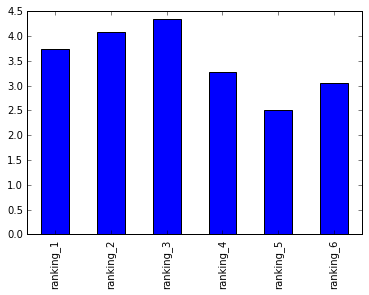

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

ranking_mean.plot(kind = 'bar')

From the bar chart above, it seems that Episode V has the lowest ranking, which meams it is the most popular one. However, we should also consider how many respondents saw each of these episodes.

Therefore, we will compute the sum of each of the seen columns we cleaned before. Since we already convert string types to boolean types, we can simply call sum() function. True will be treated like a 1, and False is treated like a 0.

In [22]:
star_wars[star_wars.columns[3:9]].sum()

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64

We can see from above that not only Episode V has the best ranking, it is also seen by most people. Therefore, the assert we just made is valid that Episode V is the most popular one among the Star Wars movies.

We can even dive further by checking the most seen movie and the highest ranked movie separately within different groups. There are several columns that segment our data into two groups, including:
(1)Do you consider yourself to be a fan of the Star Trek franchise? -- Yes or No.
(2)Gender -- Male or Female

In the following few steps, we will split the data into 2 groups based on one of the above columns and redo the 2 previous analyses (find the most seen movie and finding the highest ranked movie) separately for each group, and then compare results.

In [23]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [28]:
star_trek_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'Yes']
no_star_trek_fan = star_wars[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == 'No']

trek_fan_seen = star_trek_fan[star_trek_fan.columns[3:9]].sum()
no_trek_fan_seen = no_star_trek_fan[no_star_trek_fan.columns[3:9]].sum()

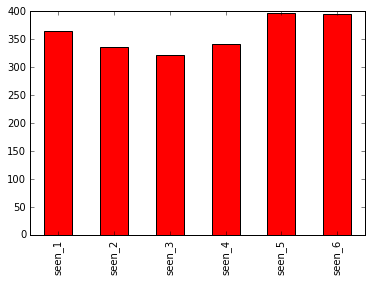

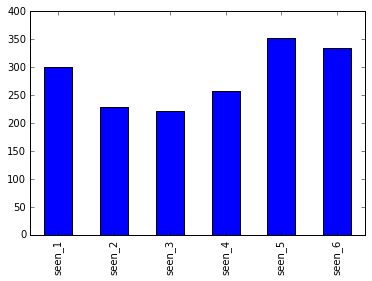

In [34]:
%matplotlib inline

fig = plt.figure()

trek_fan_seen.plot(kind = 'bar', color = 'r')
plt.show()

no_trek_fan_seen.plot(kind = 'bar', color = 'b')
plt.show()

From the above two graphs, we can see that Episode V is most seen by respondents in both groups. Fans of Star Trek tend to watch every episode, so there is no obvious difference of times seen between each episode. The numbers of movies views for each episode are evenly distributed. However, in the group of nonfans, the differences of numbers of movies viewed are more obvious. Most people have seen the Episode V and least people have seen the Episode III.

In the following steps, we will divide the respondents base on other criteria. We will also continue our cleaning process with remaining columns and do more interesting analysis, such as how people with different incomes and education like the Star War movies. 

To be continued!